<a href="https://colab.research.google.com/github/PBLEAVITT/MAT-421/blob/main/MAT421HW19_1_19_2_19_3_19_4_19_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAT 421 HW 19.1 , 19.2 , 19.3 , 19.4 , 19.5 - Parker Leavitt**

# 19.1 - Root Finding Problem Statment

The **root** or **zero** of a function, f(x), is an xr such that f(xr)=0. For example f(x)=x^2-4, the roots are 2 and -2. Sometimes finding **analytic** ,or exact, roots of a function can be more difficult to find. For Example lets try to find the roots for f(x)=sin(x)-x near 2.

In [5]:
import numpy as np
from scipy import optimize

f = lambda x: np.sin(x) - x
r = optimize.fsolve(f, 2)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)

r = [2.07167136e-08]
result= [0.]


Lets see what happens when we try to find the roots for a function that has no roots.

In [7]:
f = lambda x: 1/x

r, infodict, ier, mesg = optimize.fsolve(f, 2, full_output=True)
print("r =", r)

result = f(r)
print("result=", result)

print(mesg)

r = [3.52047363e+83]
result= [2.84052688e-84]
The number of calls to function has reached maxfev = 400.


# 19.2 - Tolerance

**Tolerance** is the level of error that is acceptable for a given application. Tolerance is a concept often used in engineering when building things that have the possibilty of failing in a given compacity such as engines in cars and elavators in a building. Tolerence allows for engineers to know how much error they can have in calculations without compromising the saftey of a system. When a computer discovers a solution that has an error smaller than the tolerence is know as the **convergence**.

# 19.3 - Bisection Method

The **Intermediate Value Therom** stats that if f(x) is a continuous function between a and b, and sign(f(a))≠sign(f(b)), then there must be a c
, such that a<c<b and f(c)=0.


The **Bisection Method** uses the Intermediate Value Therom iteravly to find roots.

Example: The √3 can be computed as the root of the function f(x)=x^2−3. Starting at a=0 and b=3, use my_bisection to approximate the √3
to a tolerance of |f(x)|<0.01 and |f(x)|<0.001.

In [15]:
import numpy as np

def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

f = lambda x: x**2 - 3

r1 = my_bisection(f, 0, 3, 0.01)
print("r1 =", r1)
r01 = my_bisection(f, 0, 3, 0.001)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.734375
r01 = 1.732177734375
f(r1) = 0.008056640625
f(r01) = 0.00043970346450805664


See what will happen if you use a=1 and b=4 for the above function.


In [14]:
import numpy as np

def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

f = lambda x: x**2 - 2

r1 = my_bisection(f, 1, 4, 0.01)
print("r1 =", r1)
r01 = my_bisection(f, 1, 4, 0.001)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.416015625
r01 = 1.41455078125
f(r1) = 0.005100250244140625
f(r01) = 0.0009539127349853516


# 19.4 - Newton-Raphson Method

The **Newton-Raphson Method** of finding roots iterates Newton steps from x0
 until the error is less than the tolerance. **Newton Steps** computes an improved guess, xi, using a previous guess xi−1, and is given by the equation:

 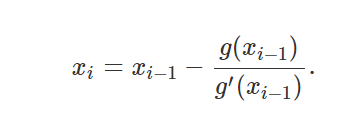

 Example: Again, the √3 is the root of the function f(x)=x2−3. Using x0=3.6
 as a starting point, use the previous equation to estimate √3. Compare this approximation with the value computed by Python’s sqrt function.

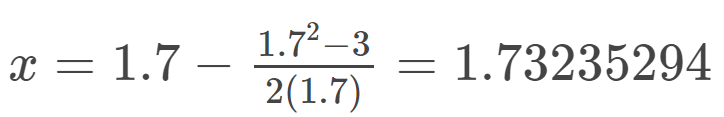

In [22]:
import numpy as np

f = lambda x: x**2 - 3
f_prime = lambda x: 2*x
newton_raphson = 1.7 - (f(1.7))/(f_prime(1.7))

print("newton_raphson =", newton_raphson)
print("sqrt(3) =", np.sqrt(3))

def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f
    # using the Newton Raphson method
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

estimate = my_newton(f, f_prime, 1.7, 1e-6)
print("estimate =", estimate)
print("sqrt(3) =", np.sqrt(3))

newton_raphson = 1.7323529411764707
sqrt(3) = 1.7320508075688772
estimate = 1.7320508339159093
sqrt(3) = 1.7320508075688772


# Root Finding in Python - 19.5

Python already has existing root-finding function built in. In this example we will use the f_solve function to find the roots.

Example: Compute the root of the function f(x)=x3−50x2−x+50 using f_solve.

In [27]:
from scipy.optimize import fsolve

f = lambda x: x**3-50*x**2-x+50

fsolve(f, [2, 80])

array([ 1., 50.])